# BVAP and Membership in the Congressional Black Caucus

In this notebook, we explore the relationship between the Black Voting Age Population (BVAP) of a congressional district and whether or not that district is represented by a member of the Congressional Black Caucus.

Data on Citizen Voting Age Population is drawn from [the 2012-2016 American Community Survey 5 year Estimates](https://www.census.gov/programs-surveys/decennial-census/about/voting-rights/cvap.html). The relevant file, `CD.csv`, is included in this repository for convenience.

Data on Congressional Black Caucus membership (`cbc.csv`) was parsed from the [Wikipedia article](https://en.wikipedia.org/wiki/Congressional_Black_Caucus#Membership) for the Congressional Black Caucus (accessed 10/9/2018). We added Rep. John Conyers (who represented Michigan's 13th Congressional District until 2017) to the dataset to reflect the Caucus's membership after the 2016 election.

## Preprocessing

The `tidy.py` script extracts the relevant data from `CD.csv` to `cvap.csv` and parses the GEOIDs of the congressional districts listed in `cbc.csv`.

## Join

As our final data manipulation step, we join the CBC membership data in `cbc.csv` with the demographic data in `cvap.csv` to produce `data.csv`.

In [54]:
import pandas
import matplotlib.pyplot

In [51]:
cbc = pandas.read_csv("./cbc.csv")
cvap = pandas.read_csv("./cvap.csv")

In [76]:
cbc_geoids = set(cbc["GEOID"])

cvap["is_in_cbc"] = cvap["GEOID"].apply(lambda geoid: geoid in cbc_geoids)

cvap.to_csv("./data.csv")

## Plots

In [78]:
bvap_cbc_df = pandas.DataFrame({
    "Rep in CBC": cvap[cvap["is_in_cbc"]]["bvap_pct"],
    "Rep not in CBC": cvap[cvap["is_in_cbc"] == False]["bvap_pct"]
})

Text(0.5,1,'BVAP% by CBC Membership')

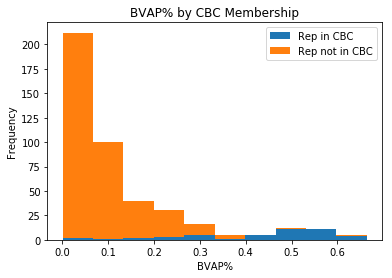

In [80]:
plot = bvap_cbc_df.plot.hist(stacked=True)
plot.set_xlabel("BVAP%")
plot.set_title("BVAP% by CBC Membership")

Text(0.5,1,'Black Population by CBC Membership')

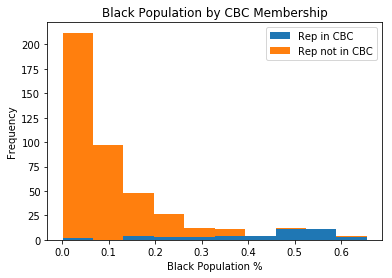

In [82]:
black_pct_df = pandas.DataFrame({
    "Rep in CBC": cvap[cvap["is_in_cbc"]]["black_pct"],
    "Rep not in CBC": cvap[cvap["is_in_cbc"] == False]["black_pct"]
})

plot = black_pct_df.plot.hist(stacked=True)
plot.set_xlabel("Black Population %")
plot.set_title("Black Population by CBC Membership")

## Districts with BVAP > 37%

The 37% BVAP level is an important cutoff point in this dataset. 91.4% of congressional districts with a BVAP of 37% or greater is represented by a member of the Congressional Black Caucus.

In [103]:
high_bvap = cvap[cvap["bvap_pct"] >= 0.37]
high_bvap

,GEOID,display_name,bvap,cvap,bvap_pct,black_pop,total_pop,black_pct,is_in_cbc
6,50000US0107,"Congressional District 7 (115th Congress), Ala...",318590,513355,0.620604,427850,675230,0.633636,True
87,50000US1198,"Delegate District (at Large) (115th Congress),...",237930,494090,0.481552,313680,659010,0.475987,False
92,50000US1205,"Congressional District 5 (115th Congress), Flo...",239950,529155,0.453459,335655,718315,0.467281,True
107,50000US1220,"Congressional District 20 (115th Congress), Fl...",235265,459945,0.511507,395580,752660,0.525576,True
111,50000US1224,"Congressional District 24 (115th Congress), Fl...",223910,443490,0.504882,353380,734085,0.481388,True
116,50000US1302,"Congressional District 2 (115th Congress), Geo...",255430,504255,0.506549,352525,685990,0.513892,True
118,50000US1304,"Congressional District 4 (115th Congress), Geo...",294465,485240,0.606844,429660,730840,0.587899,True
119,50000US1305,"Congressional District 5 (115th Congress), Geo...",322110,543810,0.592321,428530,736160,0.582115,True
127,50000US1313,"Congressional District 13 (115th Congress), Ge...",283355,487680,0.581026,416630,729460,0.571149,True
133,50000US1701,"Congressional District 1 (115th Congress), Ill...",276850,521970,0.530394,363885,710090,0.512449,True


In [104]:
percent_in_cbc = sum(high_bvap["is_in_cbc"]) / len(high_bvap)
print(percent_in_cbc)

0.9142857142857143
